# Recommendation System

*.importing required libararies

In [128]:
# import basic Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data

In [129]:
# load dataset
columns = ["user_id","item_id","rating","timestamp"]
data = pd.read_csv("/home/ramchowdary/Downloads/movie recommendation system/Movie-Recommender-in-python-master/u.data",sep='\t',names=columns)

*. columns represents the headdings of the column.

*.complete information of the given data

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


*.observe our data don't have any nulll values.

In [131]:
data.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


#*.   it represents the description about the loaded dataset

In [132]:
# print top 5 columns of the data
data.head(5)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


#  * load the title dataset

In [133]:
# load the movie titles dataset.
Titles = pd.read_csv("/home/ramchowdary/Downloads/movie recommendation system/Movie-Recommender-in-python-master/Movie_Id_Titles")

In [134]:
# complete information about the title dataset.
Titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
item_id    1682 non-null int64
title      1682 non-null object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [135]:
Titles.describe()

,item_id
count,1682.000000
mean,841.500000
std,485.695893
min,1.000000
25%,421.250000
50%,841.500000
75%,1261.750000
max,1682.000000


# *.ADD datasets

#* .merging the 2 datasets.
#* .merging the data ,Titles based on the item_id.
#* .item_id is column in both. 

In [136]:
# create movies DataFrame
movies = pd.merge(data,Titles,on = "item_id")

*. New DataFrame is made by combining the 2 DataFrames

In [137]:
# print top 5 columns
movies.head(5)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [138]:
# movies information
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
title        100003 non-null object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [139]:
movies.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


# exploratory data analysis

In [140]:
# lets create a ratings dataframe with average rating and number of ratings

# *.Creating Ratings DataFrame

*. rating column containing with in the Range from 0 to 5

*. rating represents the movie is good or not.According to that user_id.

#  *. average rating

In [141]:
# AVERAGE RATING with respect to movies.
movies.groupby("title")['rating'].mean().sort_values(ascending=False).head(5)

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [142]:
# using the no of ratings.
# because all the users are not give the rating as 5.
# suppose one user review to that movie as 5 . then average rating also be 5.
# so to overcome those situations consider the no of Ratings.

# *. No of Ratings

In [143]:
# number of ratings
# how many no of users are given the rating.
movies.groupby("title")['rating'].count().sort_values(ascending=False).head(5)

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

# lets create a ratings dataframe with average rating and number of ratings.

In [144]:
Ratings = pd.DataFrame(movies.groupby('title')['rating'].mean())

In [145]:
# creating the Ratings Dataframe  using the mean values of rating.
# it gives the average rating value of the movies.
# this is used to overcome the problems during above situations.

In [146]:
Ratings.head(5)

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [147]:
# now add the number of persons column to the Ratings dataframe
Ratings['no of users given ratings'] = pd.DataFrame(movies.groupby('title')['rating'].count())

In [148]:
Ratings.head(5)

,rating,no of users given ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


 # visualization

In [149]:
# plot the histogram based on the no of users are gives the RATING for movies.

# *histograms

# -> plot the histograms with respect to the NO of ratings.

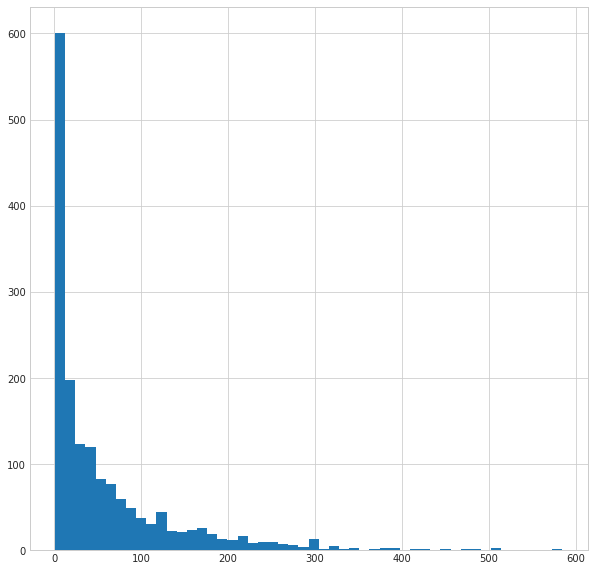

In [150]:
plt.figure(figsize=(10,10))
Ratings["no of users given ratings"].hist(bins=50)
plt.show()

observation:
    * . histogram represents the how my no of ratings are distributed.

# ->plot histogram with respect to the RATING.

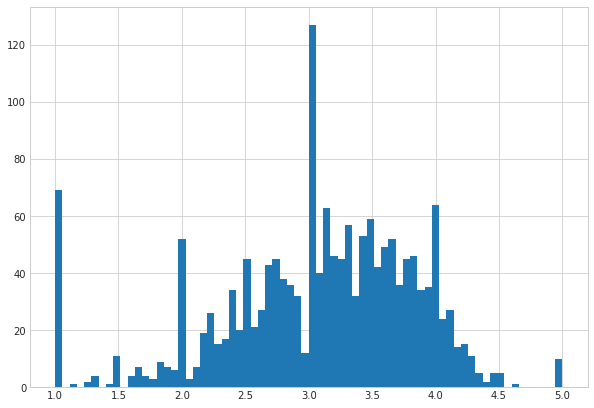

In [151]:
plt.figure(figsize=(10,7))
Ratings['rating'].hist(bins=70)
plt.show()

observation:
    * . it represents how the ratings are given to the movies.
    * . maximum no of peoples are gives the rating 3 for the movies.

# *Distribution plots:

#  -> distribution plot with respect to ratings .

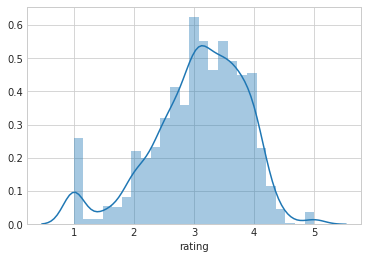

In [152]:
sns.distplot(Ratings['rating'])
plt.show()

# -> distribution plot with respect to no of ratings.

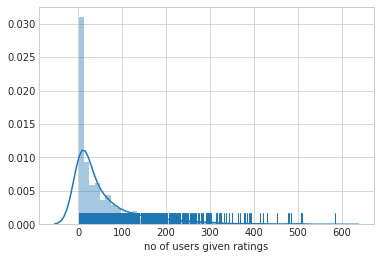

In [153]:
sns.distplot(Ratings['no of users given ratings'],rug=True)
plt.show()

In [154]:
# rugs representing the cloud at that position.

# *jointplot

In [155]:
# plot the joint plot between the rating and no of users gives the rating

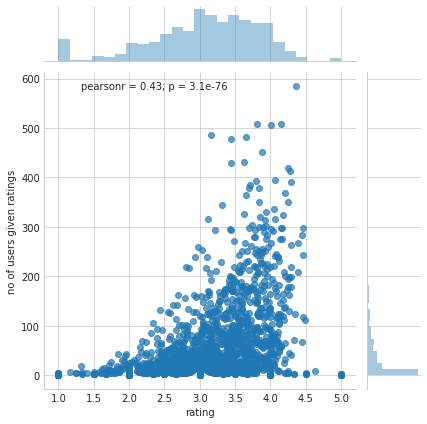

In [156]:
sns.jointplot(x='rating',y='no of users given ratings',data = Ratings,alpha=0.7)
plt.show()

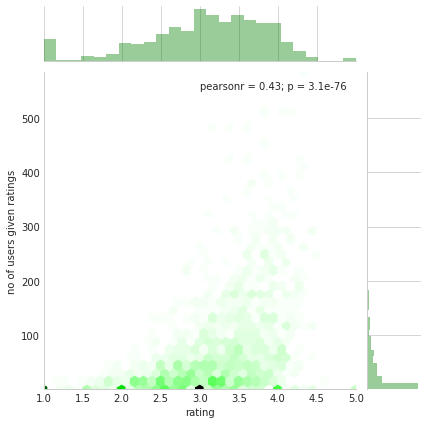

In [157]:
sns.jointplot("rating","no of users given ratings",Ratings,kind='hex',color='g')
plt.show()

In [158]:
# it represents the where both having high density.

# Recommending Similar Movies

In [161]:
# i want to create a pivot table in the form of matrix.
# the matrix that has the user_ids on one axis and movie_title on another axis.
# Each cell will then consists of the rating user gave to that movie.

In [162]:
movieMatrix = movies.pivot_table(index="user_id",columns='title',values='rating')

# *.PivotTable

In [163]:
movieMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
# it containing lot of NaN(not a number)values
# because most people have not seen most of the movies.

# *Most rated movie

In [165]:
# so pick the most rated movie
# sorting based on the no of ratings of the movies.
Ratings.sort_values('no of users given ratings',ascending=False).head(10)

,rating,no of users given ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


observation:
    
    *starwords(1997)"movie with the avg rating is 4.3 by the 584 users.


# procedure:
   
   * .pick any one of the movie
   * .grab the user ratings for those movies base on the pivot table.
   * .finding similar movies based on that movie
   * . removing the NULL values to convert the Pd series into DataFrame.
   * . add the Rating column to that DataFrame
   * . then recommending the movies base on the correlation with at leat some no of ratings 
   * . finally gives the related MOVIES.

# *Now choose any movie

In [166]:
Ratings.head()

,rating,no of users given ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


# *NOW let's grab the user ratings.

In [167]:
# *Grab the user ratings for the movie CONTACT.

In [168]:
contact_user_ratings = movieMatrix['Contact (1997)'] # title of that movie

In [169]:
contact_user_ratings.head()

user_id
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
Name: Contact (1997), dtype: float64

In [170]:
Fargo_user_ratings = movieMatrix['Fargo (1996)']

In [171]:
Fargo_user_ratings.head()

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
Name: Fargo (1996), dtype: float64

observation:
    * user 1,2 are given the rating as 5 for the Fargo movie.

# CORRELATION

In [172]:
# we can use the correlation method .
# Sx,Sy are the standard deviations.

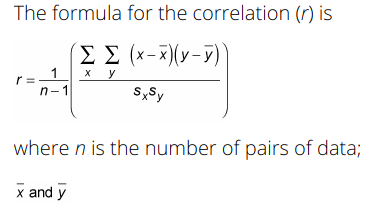

# *.similar to that movie

In [173]:
similar_to_contact = movieMatrix.corrwith(contact_user_ratings)

In [174]:
# print some rows
similar_to_contact.head()

title
'Til There Was You (1997)    0.904534
1-900 (1994)                      NaN
101 Dalmatians (1996)       -0.108441
12 Angry Men (1957)          0.022265
187 (1997)                   0.135512
dtype: float64

In [175]:
# observe we have an NaN(not a number) value.

# *.create DataFrame

In [176]:
# let's clean this by removing NaN values .
# using a DataFrame instead of series

In [177]:
corr_contact = pd.DataFrame(similar_to_contact,columns=['correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

,correlation
title,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031


Now if we sort the dataframe by CORRELATION , we should get the most similar movies,
           however note that we get some results that don't really make sense.this is because there are a lot of movies only watched once by userswho also watched contact.

In [178]:
# sort the dataframe by correlation based on my comfort.
# we should get the most similar movies
# however note that we get some results that don't really make sense.


In [179]:
corr_contact.sort_values('correlation',ascending=False).head(15)

,correlation
title,
Lamerica (1994),1.0
Faust (1994),1.0
"Wedding Gift, The (1994)",1.0
"Visitors, The (Visiteurs, Les) (1993)",1.0
King of the Hill (1993),1.0
Gold Diggers: The Secret of Bear Mountain (1995),1.0
For Ever Mozart (1996),1.0
"Innocent Sleep, The (1995)",1.0
Harlem (1993),1.0


In [180]:
# now apply the filtering  based on the no of REVIEWs.
# atleast 100 reviews (this no can be observed based on histogram)


In [181]:
#before filter
# no of users given ratings column is added  to the contact DataFrame
corr_contact = corr_contact.join(Ratings['no of users given ratings'])
corr_contact.head()

,correlation,no of users given ratings
title,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93


In [182]:
# now sort the values and notice how make a lot more sense.
#corr_contact[corr_contact['no of users given ratings']>100].sort_values("correlation",ascending=False).head()

# *.Recommending movies

In [183]:
corr_contact[corr_contact['no of users given ratings']>100].sort_values("correlation",ascending=False).head()

,correlation,no of users given ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136


# output:

# * Rcommending movies based on the Fargo.

In [184]:
similar_to_Fargo = movieMatrix.corrwith(Fargo_user_ratings)

In [185]:
#  iam trying for another movie:
corr_Fargo=pd.DataFrame(similar_to_Fargo,columns=['correlation'])


In [186]:
# remove null values
corr_Fargo.dropna(inplace=True)

In [187]:
# add the no of users given ratings column to the corr_Fargo DataFrame
corr_Fargo = corr_Fargo.join(Ratings['no of users given ratings'])


In [188]:
# sort based on the correlation with atleast 100 reviews.
corr_Fargo[corr_Fargo['no of users given ratings']>100].sort_values("correlation",ascending=False).head()

,correlation,no of users given ratings
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173


# *conclusion:

In [190]:
# it is with simple python code and basic maths